# Darks

Look at the current set of dark patches and see if I can tell how close they are to the Survey positions

Note the darks is a guess at dark patches of the sky that dates back at least to 2021; this is currently under review

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii


os.getcwd()

'/home/mejia/Research/UNAM/lvm-drp/lvmdrp/docs/nb'

In [2]:
darks=ascii.read('_data-sky/darks.txt')
darks.info()

<Table length=675>
 name  dtype 
----- -------
    i   int64
   ra float64
  dec float64
    l float64
    b float64
IMW80 float64
IMW40 float64


In [3]:
survey=ascii.read('_data-sky/survey.txt')
survey.info()

<Table length=41452>
     name      dtype 
------------- -------
           JD float64
  observatory    str3
       target   str12
        group    str6
       tileid   int64
        index   int64
           ra float64
          dec float64
           pa float64
      airmass float64
     lunation float64
shadow_height float64
    moon_dist float64
          lst float64
      exptime float64
    totaltime float64


Remove rows in survey that do not represent real observations

In [4]:
survey=survey[survey['ra']!=-999.0]
print(len(survey))

24758


In [5]:
from astro import distance

In [6]:
sky=[]
d=[]
for obs in survey:
    xdist=1e50
    isky=-99
    for dark in darks:
        dd=distance(obs['ra'],obs['dec'],dark['ra'],dark['dec'])
        if dd<xdist:
            xdist=dd
            isky=dark['i']
    d.append(xdist)
    sky.append(isky)

survey['Sky']=sky
survey['d2sky']=d
                      

In [7]:
survey

JD,observatory,target,group,tileid,index,ra,dec,pa,airmass,lunation,shadow_height,moon_dist,lst,exptime,totaltime,Sky,d2sky
float64,str3,str12,str6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
2459945.555724437,LCO,ORION_SPARSE,ORI,1001657,186,93.77620790852316,-3.2970094148192874,421.40087324569686,1.5237373455265273,0.717759999932579,505.56835196372475,61.80145548670625,3.3203582763361434,900.0,990.0000000000001,67,53.201752450316874
2459945.56718277,LCO,ORION_SPARSE,ORI,1001639,168,91.84157496288847,-4.346719453574324,421.52984315768333,1.3795186511662731,0.717759999932579,668.3959321371212,60.2663590405647,3.5961111961553494,900.0,990.0000000000001,67,54.712999974141255
2459945.578641103,LCO,ORION_SPARSE,ORI,1001631,160,91.78209505427789,-6.536020238325764,421.3585403438204,1.2852699512417967,0.717759999932579,839.559812658969,60.89570737692009,3.8718641160055993,900.0,990.0000000000001,67,56.83959218439318
2459945.590099436,LCO,ORION_SPARSE,ORI,1001610,139,89.77546548509387,-9.780658947625739,421.5392405054998,1.181422137856117,0.717759999932579,972.3517377154984,60.140607743387605,4.147617035855849,900.0,990.0000000000001,67,60.49998024127596
2459945.6015577693,LCO,ORION_SPARSE,ORI,1001625,154,91.72970664006093,-8.728140886864505,421.2249197203671,1.1701232797084387,0.717759999932579,1209.546510488979,61.57557919448619,4.423369955675056,900.0,990.0000000000001,67,58.97003552571539
2459945.6130161025,LCO,ORION_SPARSE,ORI,1001666,195,93.84556088921427,-1.119512478537509,421.6837941645332,1.2311778128661433,0.717759999932579,1704.9377583619412,61.26488103630935,4.699122875525306,900.0,990.0000000000001,67,51.07584758579525
2459945.6244744356,LCO,ORION_SPARSE,ORI,1001649,178,93.71923797855645,-5.479301275813587,421.15576845139617,1.1507679698582693,0.717759999932579,1746.681864350054,62.39302272549221,4.974875795375556,900.0,990.0000000000001,67,55.332156745267305
2459945.6359327687,LCO,ORION_SPARSE,ORI,1001674,203,93.92909391254621,1.0524558462002438,422.0053631123282,1.1975068375388596,0.717759999932579,2326.401243718953,60.786382897261845,5.2506287152258055,900.0,990.0000000000001,67,48.95487457656194
2459945.647391102,LCO,ORION_SPARSE,ORI,1001604,133,89.71573675792988,-11.976890678668799,421.51928576536056,1.0525031651919692,0.717759999932579,1811.43054978132,60.90269439330531,5.526381635045012,900.0,990.0000000000001,51,60.7168859420428


In [27]:
np.unique(survey["group"], return_counts=True)

(<Column name='group' dtype='str6' length=4>
 ALLSKY
    MCs
     MW
    ORI,
 array([ 2342,  1845, 19489,  1082]))

In [28]:
# (survey["group"] == "ORI").sum() * 8/3600
2342 * 8/3600

5.204444444444444

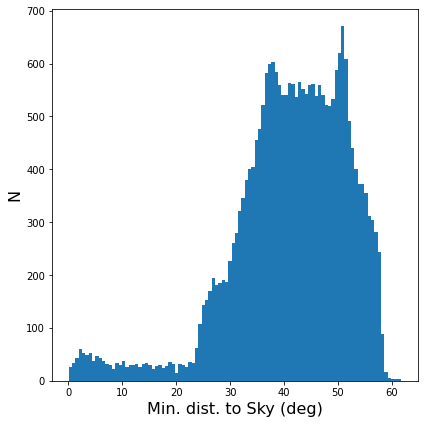

In [8]:
plt.figure(1,(6,6))
z=plt.hist(survey['d2sky'],100)
plt.xlabel('Min. dist. to Sky (deg)',size=16)
plt.ylabel('N',size=16)
plt.tight_layout()
plt.savefig('science2sky.png')

In [9]:
pos,counts=np.unique(survey['Sky'],return_counts=True)
print(len(pos),np.min(pos))
xsum=np.sort(counts)

128 0


In [10]:
foo=xsum/np.sum(xsum)
print(foo)

[4.03909847e-05 4.03909847e-05 4.03909847e-05 4.03909847e-05
 4.03909847e-05 4.03909847e-05 4.03909847e-05 4.03909847e-05
 4.03909847e-05 4.03909847e-05 4.03909847e-05 4.03909847e-05
 4.03909847e-05 4.03909847e-05 4.03909847e-05 4.03909847e-05
 4.03909847e-05 4.03909847e-05 4.03909847e-05 4.03909847e-05
 4.03909847e-05 4.03909847e-05 4.03909847e-05 4.03909847e-05
 4.03909847e-05 4.03909847e-05 4.03909847e-05 4.03909847e-05
 4.03909847e-05 4.03909847e-05 4.03909847e-05 4.03909847e-05
 4.03909847e-05 8.07819695e-05 8.07819695e-05 8.07819695e-05
 8.07819695e-05 8.07819695e-05 8.07819695e-05 8.07819695e-05
 8.07819695e-05 8.07819695e-05 8.07819695e-05 8.07819695e-05
 8.07819695e-05 8.07819695e-05 8.07819695e-05 8.07819695e-05
 8.07819695e-05 1.21172954e-04 1.21172954e-04 1.21172954e-04
 1.21172954e-04 1.21172954e-04 1.21172954e-04 1.21172954e-04
 1.21172954e-04 1.21172954e-04 1.21172954e-04 1.21172954e-04
 1.21172954e-04 1.21172954e-04 1.21172954e-04 1.21172954e-04
 1.61563939e-04 1.615639

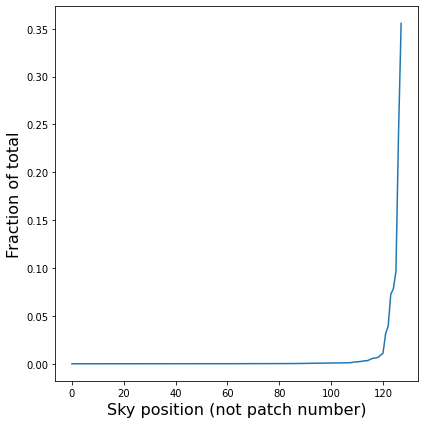

In [11]:
plt.figure(2,(6,6))
plt.plot(foo)
plt.xlabel('Sky position (not patch number)',size=16)
plt.ylabel('Fraction of total',size=16)
plt.tight_layout()
plt.savefig('SkyFrac.png')

In [12]:
targets,counts=np.unique(survey['target'],return_counts=True)
i=0
while i<len(targets):
    print('%20s %4d' % (targets[i],counts[i]))
    i+=1

             FULLSKY 2342
                 LMC 1521
                 MW1 9275
                 MW2 9831
               ORION  855
        ORION_SPARSE  227
                 SMC  324
                THOR  383


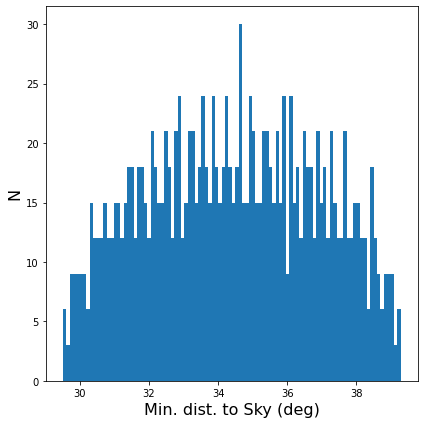

In [13]:
lmc=survey[survey['target']=='LMC']
plt.figure(1,(6,6))
z=plt.hist(lmc['d2sky'],100)
plt.xlabel('Min. dist. to Sky (deg)',size=16)
plt.ylabel('N',size=16)
plt.tight_layout()
plt.savefig('lmc.png')

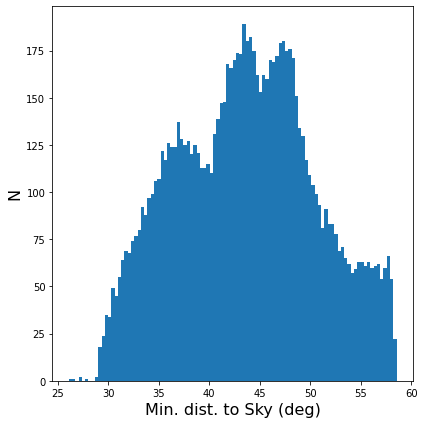

In [14]:
foo=survey[survey['target']=='MW2']
plt.figure(1,(6,6))
z=plt.hist(foo['d2sky'],100)
plt.xlabel('Min. dist. to Sky (deg)',size=16)
plt.ylabel('N',size=16)
plt.tight_layout()
plt.savefig('mw2.png')

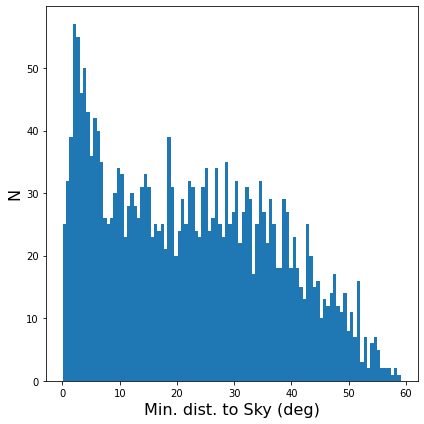

In [15]:
foo=survey[survey['target']=='FULLSKY']
plt.figure(1,(6,6))
z=plt.hist(foo['d2sky'],100)
plt.xlabel('Min. dist. to Sky (deg)',size=16)
plt.ylabel('N',size=16)
plt.tight_layout()

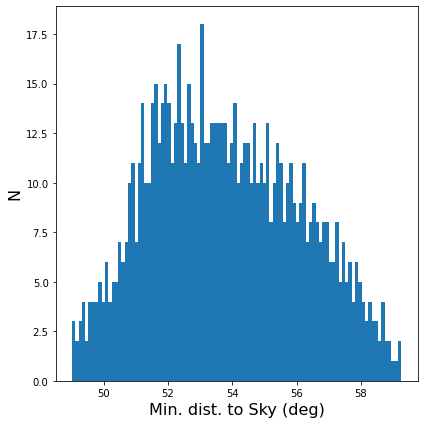

In [16]:
foo=survey[survey['target']=='ORION']
plt.figure(1,(6,6))
z=plt.hist(foo['d2sky'],100)
plt.xlabel('Min. dist. to Sky (deg)',size=16)
plt.ylabel('N',size=16)
plt.tight_layout()
plt.savefig('orion.png')

In [17]:
for one in targets:
    xfoo=survey[survey['target']==one]
    num=np.unique(xfoo['Sky'])
    # print(num)
    num=len(num)
    print('%30s %5d %3d %6.1f %6.1f  %6.1f' % (one,len(xfoo),num,np.median(xfoo['d2sky']),np.average(xfoo['d2sky']),np.std(xfoo['d2sky'])))

                       FULLSKY  2342 127   21.5   22.3    14.8
                           LMC  1521   1   34.4   34.4     2.5
                           MW1  9275   9   44.3   43.5     8.6
                           MW2  9831   6   43.8   43.6     6.9
                         ORION   855   5   53.6   53.8     2.3
                  ORION_SPARSE   227  10   47.5   48.5     6.5
                           SMC   324   2   25.9   25.9     1.4
                          THOR   383   2   43.9   43.5     2.0
